#📈Advanced Insights
###✅Correlation Analysis →
####Identify relationships between variables, e.g., DAYS_SINCE_LASTORDER vs. SALES
###✅Customer Segmentation →
####Cluster customers based on purchasing behavior

## 📂 Load the Dataset  
* We begin by loading the sales dataset to explore its structure and contents.

In [16]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans

df=pd.read_csv("drive/MyDrive/Colab Notebooks/Data.csv")
print(df.head())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10168               36      96.66                1  3479.76   

    ORDERDATE  DAYS_SINCE_LASTORDER   STATUS  PRODUCTLINE  MSRP PRODUCTCODE  \
0  24/02/2018                   828  Shipped  Motorcycles    95    S10_1678   
1  07/05/2018                   757  Shipped  Motorcycles    95    S10_1678   
2  01/07/2018                   703  Shipped  Motorcycles    95    S10_1678   
3  25/08/2018                   649  Shipped  Motorcycles    95    S10_1678   
4  28/10/2018                   586  Shipped  Motorcycles    95    S10_1678   

           CUSTOMERNAME             PHONE                   ADDRESSLINE1  \
0     Land of To

#Correlation Analysis 📌
####✅Goal: Identify relationships between key variables (e.g., DAYS_SINCE_LASTORDER vs. SALES).
####✅Method: Use a correlation heatmap and a scatter plot to analyze trends.

####✅Code for Correlation Analysis:

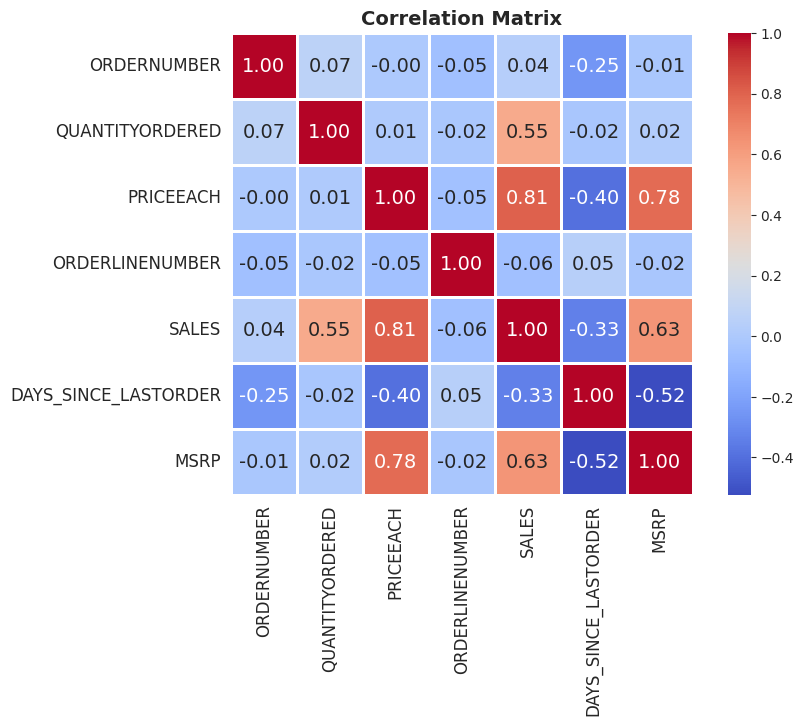

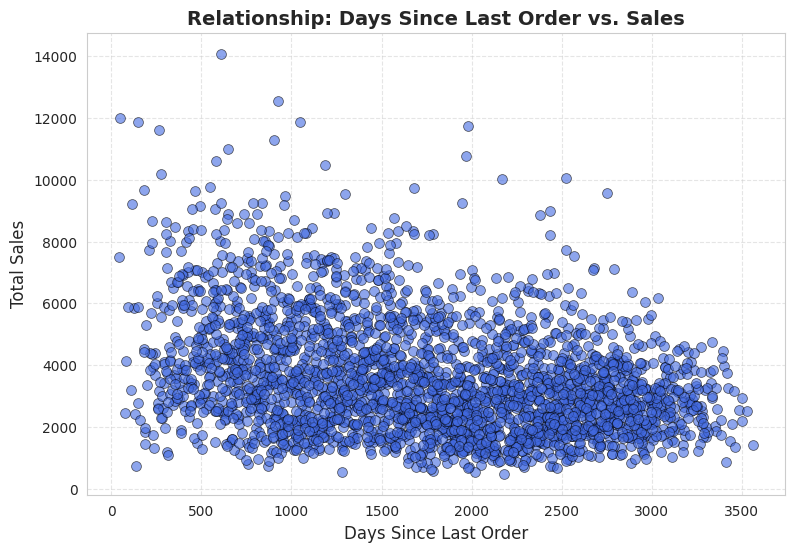

In [17]:
# Compute correlation matrix (excluding non-numeric columns)
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Set a clean style
sns.set_style("whitegrid")

# Improved Correlation Heatmap
plt.figure(figsize=(9,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, square=True, cbar=True, annot_kws={"size":14})
plt.title('Correlation Matrix', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
# Improved Scatter Plot: Sales vs. Days Since Last Order
plt.figure(figsize=(9,6))
sns.scatterplot(x=df['DAYS_SINCE_LASTORDER'], y=df['SALES'], s=50, edgecolor='black', alpha=0.6, color='royalblue')
plt.title('Relationship: Days Since Last Order vs. Sales', fontsize=14, fontweight='bold')
plt.xlabel('Days Since Last Order', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)  # Light grid for better readability
plt.show()

#Customer Segmentation 📌
####✅Goal: Cluster customers based on their purchasing behavior using K-Means Clustering.
####✅Method: Use KMeans clustering to group customers into different segments (e.g., High-Value, Regular, Occasional Buyers).

####✅Code for Customer Segmentation:

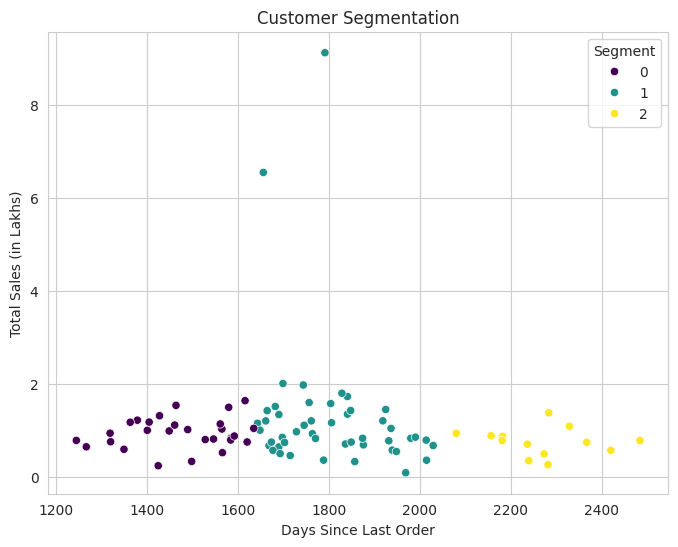

In [23]:
# Select relevant features for clustering: Use average of DAYS_SINCE_LASTORDER instead of sum
customer_data = df.groupby('CUSTOMERNAME')[['SALES', 'DAYS_SINCE_LASTORDER']].agg({'SALES': 'sum', 'DAYS_SINCE_LASTORDER': 'mean'})

# Scale SALES to Lakhs (divide by 1e5)
customer_data['SALES'] = customer_data['SALES'] / 1e5

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # 3 customer segments
customer_data['Cluster'] = kmeans.fit_predict(customer_data)

# 🔥 Scatter Plot: Customer Segmentation
plt.figure(figsize=(8,6))
sns.scatterplot(x=customer_data['DAYS_SINCE_LASTORDER'], y=customer_data['SALES'], hue=customer_data['Cluster'], palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Days Since Last Order')
plt.ylabel('Total Sales (in Lakhs)')
plt.legend(title="Segment")
plt.show()